In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 导入数据
df_train = pd.read_csv("hour.csv")
df_train.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [3]:
df_train.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
# 数据集更新了，年月日已经拆分了
# df_train["year"] = pd.DatatimeIndex(df_train["datatime"]).year

<function matplotlib.pyplot.show(*args, **kw)>

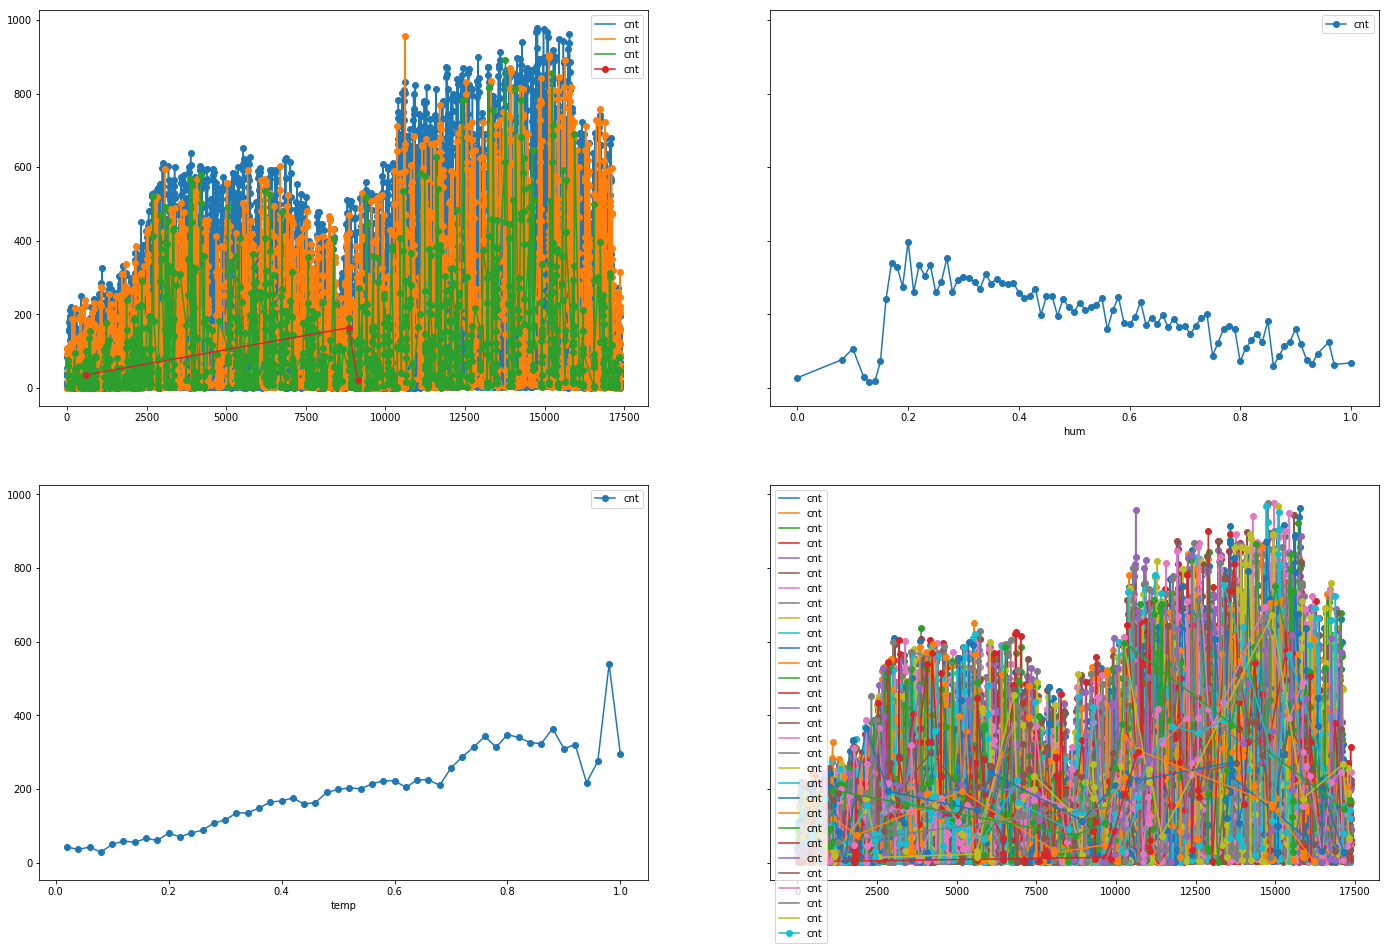

In [5]:
fig, axs = plt.subplots(2,2, sharey=True)
df_train.groupby("weathersit").plot(y="cnt", marker="o", ax=axs[0,0])
df_train.groupby("hum").mean().plot(y="cnt", marker="o",figsize=(24,16), ax=axs[0,1])
df_train.groupby("temp").mean().plot(y="cnt", marker="o", ax=axs[1,0])
df_train.groupby("windspeed").plot(y="cnt", marker="o", ax=axs[1,1])
plt.show

In [6]:
# 从上面数据看到有的特征不求均值找不到规律

<function matplotlib.pyplot.show(*args, **kw)>

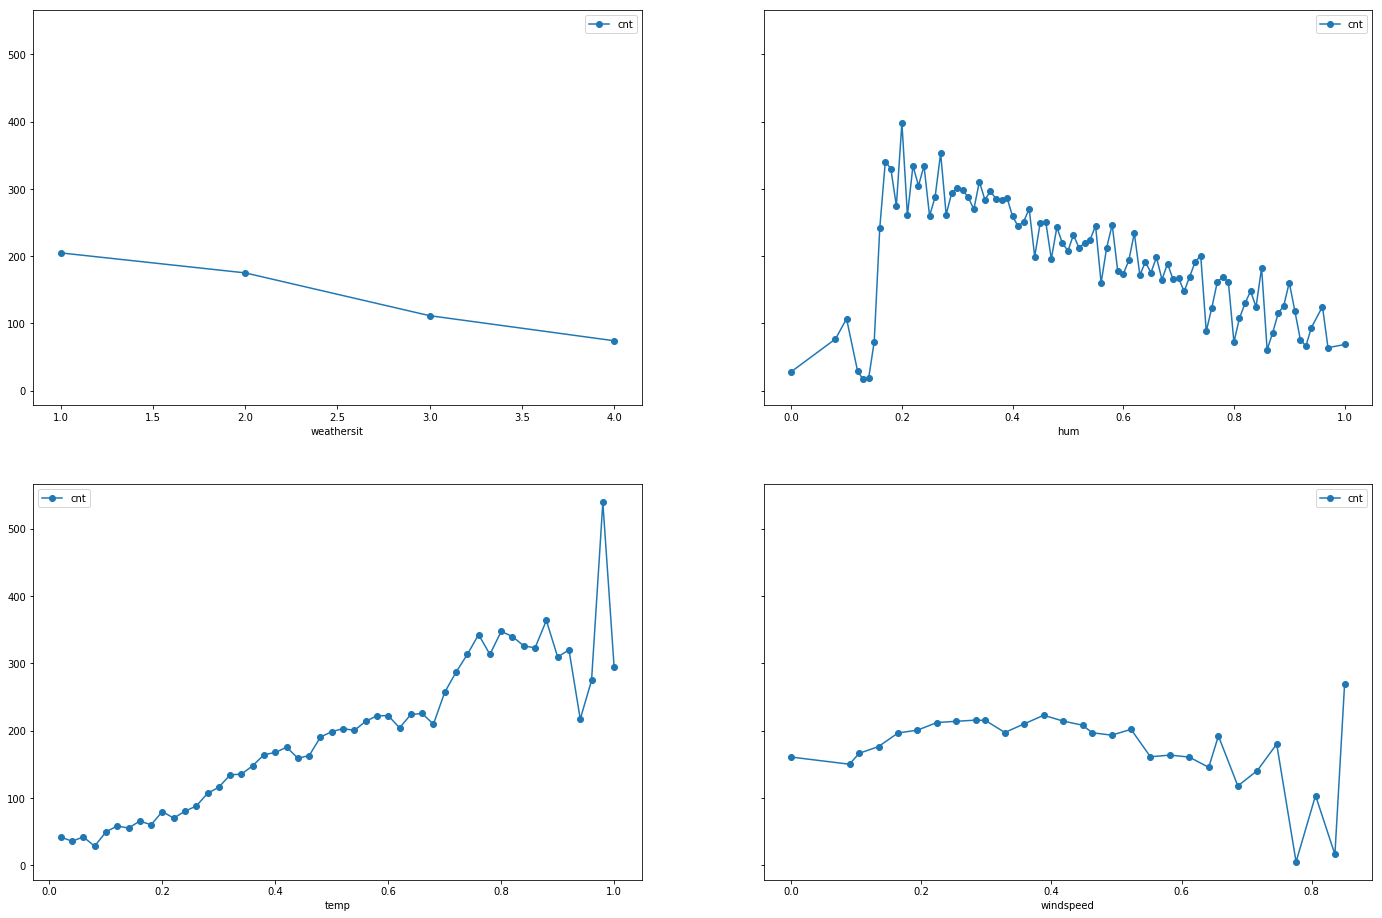

In [7]:
fig, axs = plt.subplots(2,2, sharey=True)
df_train.groupby("weathersit").mean().plot(y="cnt", marker="o", ax=axs[0,0])
df_train.groupby("hum").mean().plot(y="cnt", marker="o",figsize=(24,16), ax=axs[0,1])
df_train.groupby("temp").mean().plot(y="cnt", marker="o", ax=axs[1,0])
df_train.groupby("windspeed").mean().plot(y="cnt", marker="o", ax=axs[1,1])
plt.show

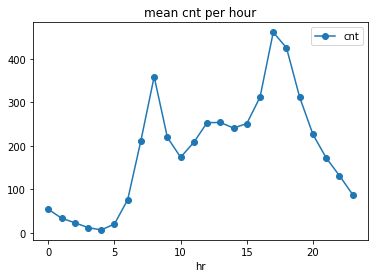

In [8]:
df_train.groupby("hr").mean().plot(y="cnt", marker="o")
plt.title("mean cnt per hour")
plt.show()

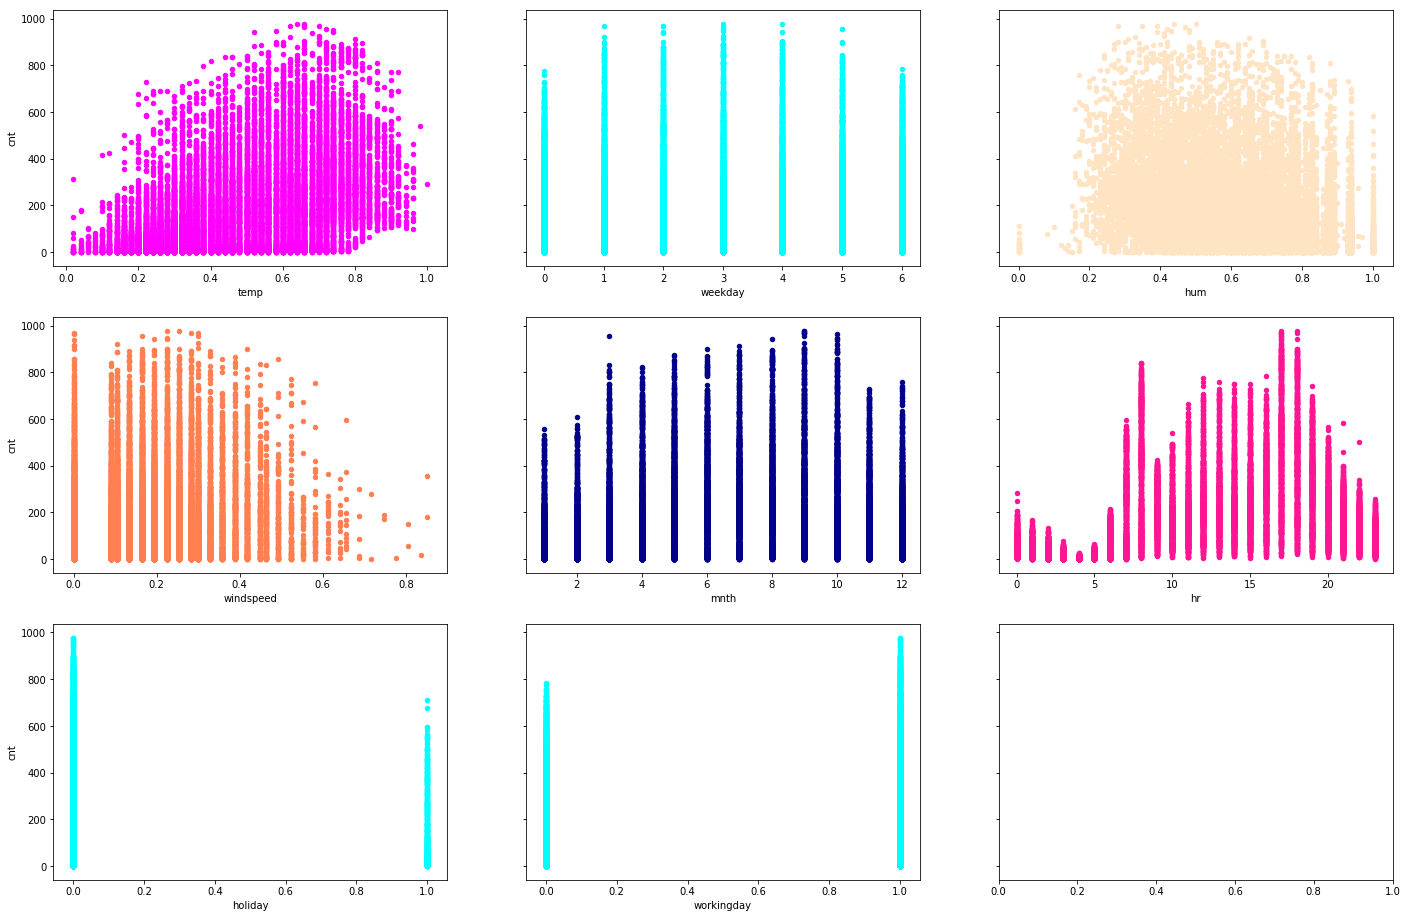

<Figure size 432x288 with 0 Axes>

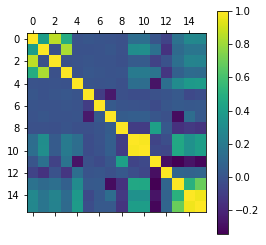

In [9]:
fig,axs = plt.subplots(3,3, sharey= True)
df_train.plot(x="temp", y="cnt", kind="scatter",figsize=(24,16),ax=axs[0,0],color="magenta")
df_train.plot(x="weekday", y="cnt", kind="scatter",ax=axs[0,1],color="cyan")
df_train.plot(x="hum", y="cnt", kind="scatter",ax=axs[0,2],color="bisque")
df_train.plot(x="windspeed", y="cnt", kind="scatter",ax=axs[1,0],color="coral")
df_train.plot(x="mnth", y="cnt", kind="scatter",ax=axs[1,1],color="darkblue")
df_train.plot(x="hr", y="cnt", kind="scatter",ax=axs[1,2],color="deeppink")
df_train.plot(x="holiday", y="cnt", kind="scatter",ax=axs[2,0],color="cyan")
df_train.plot(x="workingday", y="cnt", kind="scatter",ax=axs[2,1],color="cyan")


column = df_train.columns
corr = df_train[column].corr()
plt.figure()
# 特征间的相关矩阵
plt.matshow(corr)
plt.colorbar()
plt.show()

In [10]:
df = df_train.drop(["dteday"], axis=1)

In [11]:
df.head(3)

instant  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0        1       1   0     1   0        0        6           0           1   
1        2       1   0     1   1        0        6           0           1   
2        3       1   0     1   2        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  cnt  
0  0.24  0.2879  0.81        0.0       3          13   16  
1  0.22  0.2727  0.80        0.0       8          32   40  
2  0.22  0.2727  0.80        0.0       5          27   32

In [12]:
name = df.drop(['cnt','casual','registered'],axis=1).columns

target = df["cnt"].values
feature = df.drop(['cnt','casual','registered'],axis=1).values

from sklearn import preprocessing
# 对特征进行归一化等

feture = preprocessing.scale(feature)

In [13]:
print("name:", name)
print(feature)
print("target:", target)

name: Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')
[[1.0000e+00 1.0000e+00 0.0000e+00 ... 2.8790e-01 8.1000e-01 0.0000e+00]
 [2.0000e+00 1.0000e+00 0.0000e+00 ... 2.7270e-01 8.0000e-01 0.0000e+00]
 [3.0000e+00 1.0000e+00 0.0000e+00 ... 2.7270e-01 8.0000e-01 0.0000e+00]
 ...
 [1.7377e+04 1.0000e+00 1.0000e+00 ... 2.5760e-01 6.0000e-01 1.6420e-01]
 [1.7378e+04 1.0000e+00 1.0000e+00 ... 2.7270e-01 5.6000e-01 1.3430e-01]
 [1.7379e+04 1.0000e+00 1.0000e+00 ... 2.7270e-01 6.5000e-01 1.3430e-01]]
target: [16 40 32 ... 90 61 49]


In [14]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [15]:
# 高斯朴素贝叶斯估计器
from sklearn.naive_bayes import GaussianNB

cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
estimator = GaussianNB()
X = feature; y= target
train_sizes, train_scores, test_scores = learning_curve( \
        estimator, X, y, cv=cv, n_jobs=4)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [16]:
print(train_scores_mean)
print(train_scores_std)

print(test_scores_mean)
print(test_scores_std)
print(train_sizes)

[0.27336915 0.0868508  0.05528739 0.04253044 0.03589842]
[0.01112578 0.00475373 0.00310955 0.00220448 0.00113147]
[0.00720368 0.0118527  0.0136939  0.01440736 0.01493671]
[0.00143008 0.00249211 0.00216206 0.00155483 0.00156586]
[ 1303  4236  7168 10101 13034]


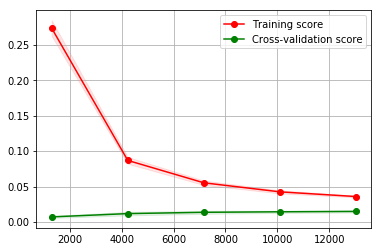

In [17]:
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")
plt.show()   
# 高斯贝叶斯朴素估计模型

In [53]:
def estm(estimator, X, y, n_jobs=1):
    cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
    
    train_sizes, train_scores, test_scores = learning_curve( \
        estimator, X, y, shuffle=True, cv=cv, n_jobs=n_jobs)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    print("train_mean:", train_scores_mean)
    print("test_mean:", test_scores_mean)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.legend(loc="best")
    plt.show()

train_mean: [0.39290346 0.3910804  0.38899554 0.39035204 0.38907019]
test_mean: [0.38332278 0.38627641 0.38702503 0.38727722 0.38735053]


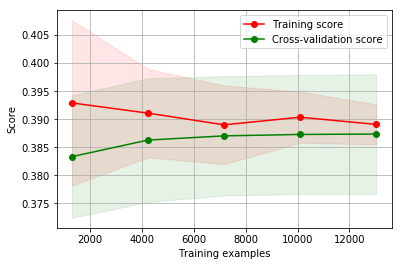

In [54]:
# 岭回归估计器
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1, fit_intercept=True)

estm(estimator = ridge, X = feature, y= target) # 岭回归

train_mean: [-0.02780901  0.01771899  0.04605179  0.06373237  0.07625003]
test_mean: [-0.03268469  0.01047544  0.03902897  0.05788598  0.07044845]


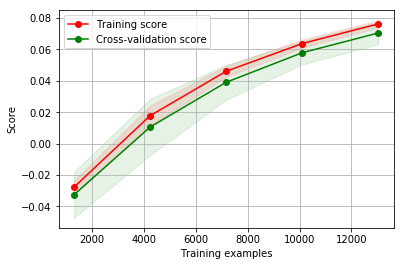

In [55]:
# svm估计器
from sklearn.svm import SVR
svm_est = SVR(gamma="scale")
estm(estimator = svm_est, X = feature, y= target)

In [62]:
#跑上面的svm模型真的很慢

In [63]:
# 随机森林估计器
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)

train_mean: [0.95935031 0.95542485 0.95032115 0.94648625 0.94422042]
test_mean: [0.85103462 0.90982391 0.91819348 0.92103033 0.92347536]


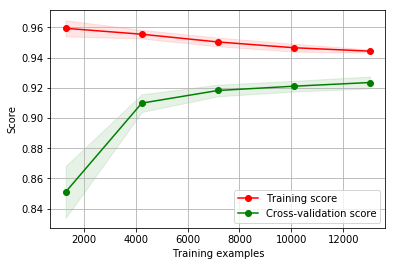

In [66]:
rfr_best = RandomForestRegressor(n_estimators=100, max_depth=10)
estm(rfr_best, X = feature, y= target)

train_mean: [0.98167846 0.98956945 0.99139242 0.99227577 0.99268494]
test_mean: [0.86680905 0.92746839 0.93951654 0.94448014 0.9484968 ]


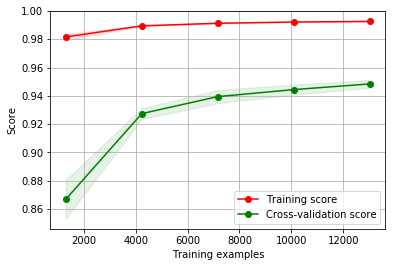

In [67]:
estm(rfr, X = feature, y= target)

In [68]:
df2 = df_train.drop(['holiday', 'weekday','workingday',
                      'dteday','casual','registered'],axis=1)
# 删掉三个可能不相关的特征 :holiday, weekday, workingday

In [69]:
df2.head(5)

instant  season  yr  mnth  hr  weathersit  temp   atemp   hum  windspeed  \
0        1       1   0     1   0           1  0.24  0.2879  0.81        0.0   
1        2       1   0     1   1           1  0.22  0.2727  0.80        0.0   
2        3       1   0     1   2           1  0.22  0.2727  0.80        0.0   
3        4       1   0     1   3           1  0.24  0.2879  0.75        0.0   
4        5       1   0     1   4           1  0.24  0.2879  0.75        0.0   

   cnt  
0   16  
1   40  
2   32  
3   13  
4    1

train_mean: [0.96254768 0.96800351 0.96966206 0.97165311 0.97301559]
test_mean: [0.73635969 0.76869966 0.78680719 0.79770389 0.80788745]


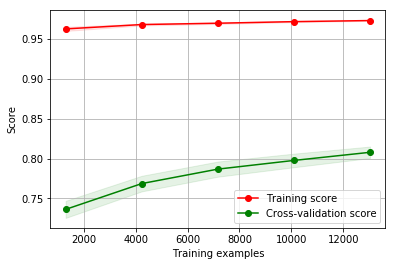

In [75]:
# 减少三个特征后的随机森林效果
target2 = df2["cnt"].values
feature2 = df2.drop(['cnt'],axis=1).values
estm(rfr, X = feature2, y= target2)

In [76]:
# 效果变差了，说明并不是冗余的特征

In [77]:
# 网格搜索法来寻找最优参数
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(feature, target, test_size=0.2,\
                                                 shuffle=True, random_state=None)
 
#构建网格参数
param_grid = {
    'n_estimators': [10, 100, 500],
    'max_depth': list(range(2,11))
            }
 
#初始化模型
forest = RandomForestRegressor()
#初始化网格搜索
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5,
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
 
#查看最好的参数选择
print(grid_search.best_params_)
 
#使用网格搜索得到的最好的参数选择进行模型训练
best_forest = grid_search.best_estimator_
best_forest.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  4.4min finished


{'max_depth': 10, 'n_estimators': 500}


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [78]:
# for params, mean_score, scores in grid_search.grid_
print(grid_search.cv_results_)

{'mean_fit_time': array([ 0.13319407,  1.45894413,  7.69540601,  0.21543045,  2.12760754,
       10.19142137,  0.25360661,  2.50598874, 12.50833755,  0.32933621,
        3.05163474, 15.49317541,  0.40856681,  3.53402071, 17.51183238,
        0.4156352 ,  3.97993717, 19.81730919,  0.41597514,  4.47582984,
       22.97348342,  0.52254672,  5.08494382, 25.21887112,  0.56973372,
        5.89285698, 24.89119835]), 'std_fit_time': array([0.00597661, 0.06011933, 0.15387387, 0.06057044, 0.18664663,
       0.35262105, 0.05621877, 0.0846163 , 0.12028449, 0.03099818,
       0.16301284, 0.3957759 , 0.05232937, 0.18943767, 0.23094902,
       0.05952818, 0.08112081, 0.35501047, 0.02914394, 0.25369788,
       0.60628481, 0.07118387, 0.21263516, 0.33981729, 0.08466858,
       0.14657052, 4.06957062]), 'mean_score_time': array([0.00348597, 0.02038913, 0.11069765, 0.00612483, 0.03590779,
       0.14690261, 0.00495086, 0.03047194, 0.13486309, 0.00470958,
       0.02950215, 0.1779366 , 0.00487576, 0.03642

train_mean: [0.96268762 0.95542684 0.95017855 0.94705958 0.94422869]
test_mean: [0.85949261 0.91012582 0.91893709 0.92240978 0.92330138]


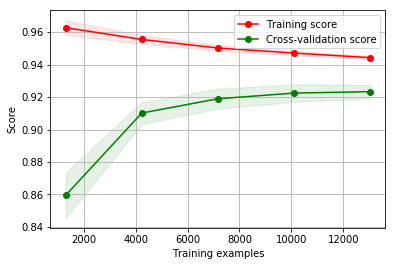

In [79]:
rfr_best = RandomForestRegressor(n_estimators=100, max_depth=10)
estm(rfr_best, X = feature, y= target)

In [80]:
# 尝试原来博客中的参数，使用五折交叉验证而不是shufflesplit，树的深度不设置上限

In [82]:
def estm2(estimator, X, y, n_jobs=1,cv = 5):
      
    train_sizes, train_scores, test_scores = learning_curve( \
        estimator, X, y, shuffle=True, cv=cv, n_jobs=n_jobs)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    print("train_mean:", train_scores_mean)
    print("test_mean:", test_scores_mean)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.legend(loc="best")
    plt.show()

train_mean: [0.98351078 0.99064278 0.99200975 0.99274763 0.99327549]
test_mean: [0.701878   0.75343972 0.77403515 0.79018347 0.79756075]


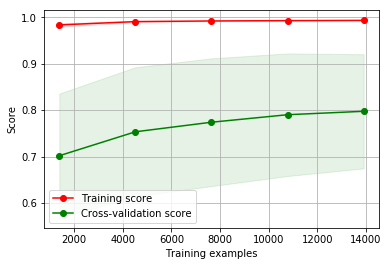

In [83]:
r = RandomForestRegressor(n_estimators=100)
estm2(r, X = feature, y= target)

In [84]:
# 通过还原数据得到结论，树的深度剪枝可以避免过拟合，用shufflesplit比5折交叉验证的效果要提升很多。

In [93]:
rfr_best = RandomForestRegressor(n_estimators=100,max_depth=10).fit(feature, target)

test_scale = feature
pred = np.array(rfr_best.predict(test_scale))
dic = dict()
dic.update({'pred_result':pred, "datatime":df_train["dteday"], "hour":df_train["hr"]})
import pandas
df_pre_result = pandas.DataFrame(data=dic)
df_pre_result.head(15)

pred_result    datatime  hour
0     25.197721  2011-01-01     0
1     28.853542  2011-01-01     1
2     25.540445  2011-01-01     2
3     10.315996  2011-01-01     3
4      2.496642  2011-01-01     4
5      2.477209  2011-01-01     5
6      3.044991  2011-01-01     6
7     30.548464  2011-01-01     7
8     43.904548  2011-01-01     8
9     51.795345  2011-01-01     9
10    69.528911  2011-01-01    10
11    71.463207  2011-01-01    11
12    92.183035  2011-01-01    12
13   111.922991  2011-01-01    13
14   113.988334  2011-01-01    14